![](https://pptwinpics.oss-cn-beijing.aliyuncs.com/CDA%E8%AE%B2%E5%B8%88%E6%B0%B4%E5%8D%B0_20200314161940.png)

# CDA 免费直播课-Python 基础

## 自我介绍

大家好，我是 CDA 曹鑫。

代码和学习资料：https://github.com/imcda

学习小组：http://edu.cda.cn/group/19


## 课程前瞻

### 主课程：（1h）
- 为什么要学 Python？
    - 最好的编程语言
- Python 安装
    - Anaconda 的安装
- Python 环境和包的管理
    - Conda 的使用
- Python 编程工具
    - Jupyter Notebook 的使用
    
### 附加课：
- Sublime Text 的安装：https://www.sublimetext.com/
- Pycharm 的安装：https://www.jetbrains.com/pycharm/download/#section=mac

# 为什么学 Python？

**小组话题:** http://edu.cda.cn/group/19/thread/93

## Python 评分最高

http://pypl.github.io/PYPL.html

## Python 能做的事情很多

### 数据抓取

你可以利用 Python 爬虫。



In [44]:
# 导入包
import pandas as pd 
import requests
import re
import parsel
from fake_useragent import UserAgent
pd.set_option('display.max_rows', 500)

def get_one_paeg(url):
    '''功能：给定URL，获取猫眼top一页信息''' 
    headers = {'user-agent': UserAgent().random} 
    # 发起请求
    r = requests.get(url, headers=headers) 
    # 解析数据
    html = parsel.Selector(r.text) 

    # 获取数据
    rank_num = html.xpath('//dd/i/text()').extract()
    movie_name = html.xpath('//dd//p[@class="name"]/a/text()').extract()
    actors = [i.strip() for i in html.xpath('//dd//p[@class="star"]/text()').extract()]
    release_time = html.xpath('//dd//p[@class="releasetime"]/text()').extract()
    score = [''.join(re.findall(r' class="integer">(.*?)</i><i class="fraction">(.*?)</i></p>', i)[0])
             for i in html.xpath('//dd//p[@class="score"]').extract()]
    
    # 存储数据
    df = pd.DataFrame({'rank_num': rank_num,
                       'movie_name': movie_name,
                       'actors': actors,
                       'release_time': release_time,
                       'score': score
                          })
    return df

def get_10_page():
    '''功能：给定URL，获取猫眼top100信息''' 
    df_all = pd.DataFrame()
    
    for i in range(10):
        url = 'https://maoyan.com/board/4?offset={}'.format(i*10)
        df_one = get_one_paeg(url)
        df_all = df_all.append(df_one, ignore_index=True)

    return df_all


df_all = get_10_page()
df_all.to_csv('maoyan.csv', index=False) 
df_all

,rank_num,movie_name,actors,release_time,score
0,1,霸王别姬,"主演：张国荣,张丰毅,巩俐",上映时间：1993-07-26,9.5
1,2,肖申克的救赎,"主演：蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",上映时间：1994-09-10(加拿大),9.5
2,3,这个杀手不太冷,"主演：让·雷诺,加里·奥德曼,娜塔莉·波特曼",上映时间：1994-09-14(法国),9.5
3,4,罗马假日,"主演：格利高里·派克,奥黛丽·赫本,埃迪·艾伯特",上映时间：1953-08-20(意大利),9.0
4,5,泰坦尼克号,"主演：莱昂纳多·迪卡普里奥,凯特·温丝莱特,比利·赞恩",上映时间：1998-04-03,9.4
5,6,乱世佳人,"主演：费雯·丽,克拉克·盖博,奥利维娅·德哈维兰",上映时间：1939-12-15(美国),9.1
6,7,唐伯虎点秋香,"主演：周星驰,巩俐,郑佩佩",上映时间：1993-07-01(中国香港),9.1
7,8,魂断蓝桥,"主演：费雯·丽,罗伯特·泰勒,露塞尔·沃特森",上映时间：1940-05-17(美国),9.2
8,9,辛德勒的名单,"主演：连姆·尼森,拉尔夫·费因斯,本·金斯利",上映时间：1993-11-30(美国),9.2
9,10,喜剧之王,"主演：周星驰,莫文蔚,张柏芝",上映时间：1999-02-13(中国香港),9.1


### 数据处理

你可以利用 Python 处理数据，尤其是海量数据，Excel 打开都困难的，EXCEL 2016最多是104856行

### 数据可视化

你可以利用 Python 将数据转化成图，更加形象生动。



In [27]:
# 使用pyecharts绘制南丁格尔玫瑰图

# 导入包
from pyecharts.charts import Pie
from pyecharts import options as opts

# 准备数据：省份和对应的连续多日疫情零新增数量、颜色序列
provinces = ['西藏', '澳门', '青海', '贵州', '新疆',
             '江苏', '内蒙古', '陕西', '海南', '云南',
             '吉林', '山西', '重庆', '广西', '福建',
             '江西', '安徽', '河北', '天津', '湖南',
             '辽宁', '宁夏', '浙江', '四川', '上海',
             '黑龙江', '北京']
number = [42, 37, 35, 24, 23, 22, 22, 21, 21, 20, 17, 16, 16,
       16, 14, 13, 13, 13, 13, 12, 9, 8, 7, 7, 1, 1, 1]
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
              '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
              '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B'
              '#7D3990','#A63F98','#C31C88','#D52178','#D5225B',
              '#D02C2A','#D44C2D','#F57A34','#FA8F2F','#D99D21',
              '#CF7B25','#CF7B25','#CF7B25']

# 创建饼图
pie = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))

# 添加数据
pie.add("", [list(z) for z in zip(provinces, number)],
        radius=["30%", "135%"],
        center=["50%", "65%"],
        rosetype="area"
        )

# 设置全局配置
pie.set_global_opts(title_opts=opts.TitleOpts(title='\t\t\t\t\t\t\t多省市\n确诊病例连续多日',
                                              subtitle='\t\t\t零新增',
                                              pos_left='42.5%', pos_right='50%',
                                              pos_top='60%', pos_bottom='50%',
                                              title_textstyle_opts=opts.TextStyleOpts(font_size=25),
                                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size=30,
                                                                                         font_family='monospace',
                                                                                         font_style='normal',
                                                                                         background_color='red',
                                                                                         rich={'color': 'red'})
                                              ),
                    legend_opts=opts.LegendOpts(is_show=False)
                   )

# 设置系列配置和颜色
pie.set_series_opts(label_opts=opts.LabelOpts(
                    is_show=True, position="inside", font_size=12,
                    formatter="{b}:{c}天", font_style="italic",
                    font_weight="bold", font_family="Microsoft YaHei"
                                              )
                    )

pie.set_colors(color_series)

# 在网页生成图片
pie.render('南丁格尔玫瑰图.html') 

'/Users/davidfnck/Downloads/All-Lessons/Python Tutorial for Humans™/013-Python 直播课/南丁格尔玫瑰图.html'

### 数据挖掘

你可以利用 Python 从数据中找到更深层次的信息。


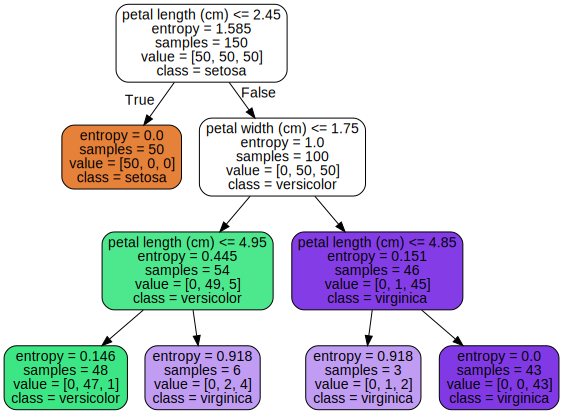

In [29]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# 建立决策树
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
clf = clf.fit(iris.data, iris.target)

# 可视化
# 决策树可视化
dot_data = tree.export_graphviz(decision_tree=clf,
                                 out_file=None, 
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names, 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

### 自动化办公：一样的工作，你要花1小时，我只要 10 秒钟

In [9]:
from docx import Document
import xlrd


def change_text(old_text, new_text):
    all_paragraphs = document.paragraphs
    for paragraph in all_paragraphs:
        for run in paragraph.runs:
            run_text = run.text.replace(old_text, new_text)
            run.text = run_text

    all_tables = document.tables
    for table in all_tables:
        for row in table.rows:
            for cell in row.cells:
                cell_text = cell.text.replace(old_text, new_text)
                cell.text = cell_text


xlsx = xlrd.open_workbook('Excel_Files/合同信息表.xlsx')
sheet = xlsx.sheet_by_index(0)

for table_row in range(1, sheet.nrows):
    document = Document("Word_Files/修改模板.docx")
    for table_col in range(0, sheet.ncols):
        change_text(str(sheet.cell_value(0, table_col)), str(sheet.cell_value(table_row, table_col)))

    document.save("Word_Files/%s合同.docx" % str(sheet.cell_value(table_row, 2)))
    print("%s合同完成" % str(sheet.cell_value(table_row, 2)))

A公司合同完成
B公司合同完成
C公司合同完成
D公司合同完成
E公司合同完成
F公司合同完成
G公司合同完成
H公司合同完成
I公司合同完成
J公司合同完成
K公司合同完成
L公司合同完成
M公司合同完成
N公司合同完成
O公司合同完成
P公司合同完成
Q公司合同完成
R公司合同完成


# Python 安装

https://www.anaconda.com/

[文字版教程](https://github.com/imcda/Python-Tutorial-for-Humans/blob/master/002-%E5%AE%89%E8%A3%85%20Python/001-Anaconda%20%E5%AE%89%E8%A3%85%E5%8F%8A%E6%93%8D%E4%BD%9C.md)

# Python 环境和包的管理

[文字版教程](https://github.com/imcda/Python-Tutorial-for-Humans/blob/master/002-%E5%AE%89%E8%A3%85%20Python/001-Anaconda%20%E5%AE%89%E8%A3%85%E5%8F%8A%E6%93%8D%E4%BD%9C.md)

# Python 编程工具

[文字版教程](https://github.com/imcda/Python-Tutorial-for-Humans/blob/master/002-%E5%AE%89%E8%A3%85%20Python/002-Jupyter%20Notebook%20%E6%95%99%E7%A8%8B.ipynb)